# Random potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Np=128

In [3]:
Vi=np.random.uniform(0,1,Np)

k=np.fft.rfftfreq(Np)
kc=.0125
kc=np.random.uniform(1,10)*k[1]
V0=3
M=4
Vk=V0*np.fft.rfft(Vi)
Vx=np.fft.irfft(np.exp(-(k/kc)**M)*Vk)
print(kc,k[1],k[2])

0.02645905821281215 0.0078125 0.015625


In [4]:
beta=0.5
x=np.arange(Np)
x1=Np//5
f1=0.5*(1-np.tanh(beta*(x-x1)))
x2=x[-1]-x1
f2=0.5*(1+np.tanh(beta*(x-x2)))
f12=1-f1-f2

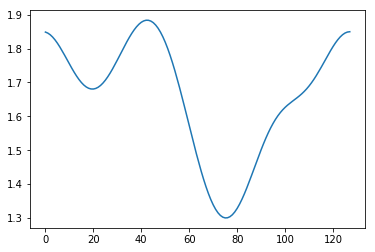

In [5]:
#plt.plot(Vi)
plt.plot(Vx)
#plt.plot(f1)
#plt.plot(f2)
#plt.plot(f12)
#Vmax=2
#plt.plot(Vmax*(f1+f2)+Vx*f12)
#plt.plot(Vx*f12)

In [51]:
def ptl_num(mu,Vx,gg):
    return np.clip((mu-Vx)/gg, a_min=0, a_max=None)

def fmu(mu):
    from scipy.integrate import trapz
    gg=1
    dx=0.1
    return trapz(ptl_num(mu,Vx,gg))*dx-1
    #return mu**2-mu

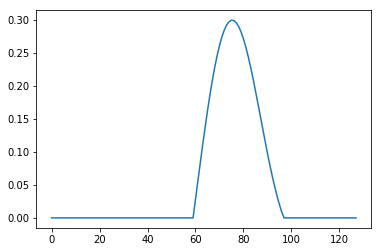

In [52]:
n_tf=ptl_num(1.6,Vx,1.)

plt.plot(n_tf)

In [54]:
from scipy.optimize import newton

print(fmu(1.6))

mu=newton(fmu,1.6)

print(mu)

print(fmu(mu))

-0.33335363061579826
1.674981446243209
-3.3306690738754696e-16


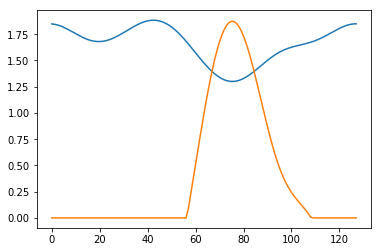

In [59]:
plt.plot(Vx)
plt.plot(5*ptl_num(mu,Vx,1.))